# QCTO - Workplace Module

### Project Title: Regional Vegetable Price Analysis: Trends and Seasonality
#### Done By: Abel Masotla

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

## **Github Link**

https://github.com/Masotlaabel/QCTO-Project

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>


**Purpose:**  
This project aims to analyze vegetable prices across different regions using data from an authorized source ([Agmarknet](https://agmarknet.gov.in/)). The main objective is to explore pricing trends, identify patterns, and understand the factors influencing price fluctuations over time.

**Problem Domain:**  
Vegetable prices are highly variable, influenced by several factors such as regional availability, seasonality, weather conditions, and market demand. These fluctuations can impact both consumers and producers, making it crucial to analyze the trends to predict future price changes and minimize uncertainties.

The project seeks to address the following key questions:
- What are the **average price trends** for specific vegetables across different regions over time?
- Are there any **patterns of price volatility** or sudden changes that occur frequently?
- How does **seasonality** influence the prices of various vegetables, and can it be predicted?
- What role do **regional factors** play in pricing differences across different geographical areas?

**Significance:**  
Understanding vegetable pricing trends can offer insights to:
- **Consumers**, by helping them plan their purchases based on expected price changes.
- **Farmers**, by enabling them to optimize their planting and selling strategies to maximize profits.
- **Policymakers**, by providing data to stabilize prices and avoid extreme volatility in the market.


---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [263]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
The dataset used in this project is sourced from Kaggle, which cites Agmarknet ([Agmarknet](https://agmarknet.gov.in/)) as the original source for the vegetable price data. The dataset provides extensive details on vegetable prices across various regions in India, collected over a specified time period.

**Data Characteristics:**
- **Size:** The dataset contains thousands of rows, each representing a vegetable price record.
- **Scope:** Prices of various vegetables in multiple regions across different time periods.
- **Data Types:** 
  - Categorical (vegetable names, region)
  - Numerical (price)
  - Temporal (dates)
---

In [264]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [265]:
# Load the CSV file
df = pd.read_csv("prices.csv")

# Display the first few rows
df.head(100
        )


,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
95,07-05-2023,24.5,16,10.0,20,25,90,70,10,30.0,15
96,08-05-2023,22.0,16,10.0,20,20,90,70,10,35.0,30
97,09-05-2023,20.0,16,10.0,20,20,90,60,10,40.0,30
98,10-05-2023,20.0,16,10.0,20,20,90,60,10,35.0,25


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [267]:
# Convert 'Price Dates' to datetime
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')

# Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())
df.dropna(inplace=True)  # Drop rows with missing values



# Handle outliers using the IQR method for all numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# Correct errors in data types
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')
numeric_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 
                   'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

# Summary of cleaned data
print(df.info())
print(df.describe())
print("Data after cleaning:")

Missing values before cleaning:
Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Price Dates             178 non-null    datetime64[ns]
 1   Bhindi (Ladies finger)  178 non-null    float64       
 2   Tomato                  178 non-null    int64         
 3   Onion                   178 non-null    float64       
 4   Potato                  178 non-null    int64         
 5   Brinjal                 178 non-null    int64         
 6   Garlic                  178 non-null    int64         
 7

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


## Time Series Analysis 

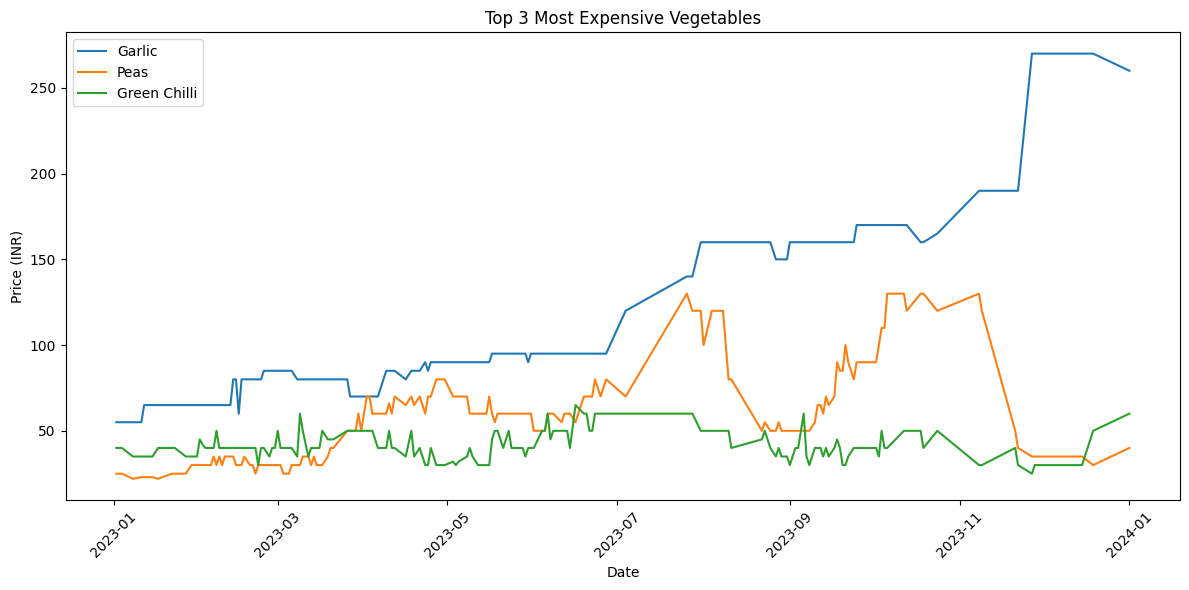

In [268]:
# Get the list of vegetable columns
vegetables = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 
              'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']

# Calculate the top 3 vegetables with the highest average price
top_3_vegetables = df[vegetables].mean().nlargest(3).index

# Plot the prices of the top 3 vegetables over time
plt.figure(figsize=(12, 6))

for veg in top_3_vegetables:
    plt.plot(df['Price Dates'], df[veg], label=veg)

plt.title('Top 3 Most Expensive Vegetables')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




1. **Garlic (Blue Line):** The price of garlic starts at around 50 INR in January 2023 and shows a gradual increase with some fluctuations. There is a significant spike in the price around July 2023, reaching over 150 INR, and it continues to rise, peaking at around 250 INR towards the end of the year. This indicates that garlic is generally more expensive and has a wide range of prices, suggesting variability in supply and demand throughout the year.

2. **Peas (Orange Line):** The price of peas starts below 50 INR and remains relatively stable with minor fluctuations until around June 2023. There is a sharp increase in the price around July 2023, peaking at around 150 INR, followed by a steep decline in October 2023. The price then stabilizes at a lower level towards the end of the year. This pattern suggests a seasonal spike in demand or a supply shortage during mid-year.

3. **Green Chilli (Green Line):** The price of green chilli starts below 50 INR and shows more frequent fluctuations compared to garlic and peas. The price remains relatively stable with minor ups and downs throughout the year, with a slight increase towards the end of the year. This indicates a dynamic market with frequent changes in supply and demand.

Overall, the graph provides insights into the price volatility and trends of these vegetables over the year, highlighting garlic as the most expensive and volatile, peas with significant fluctuations, and green chilli as the least expensive and most stable.

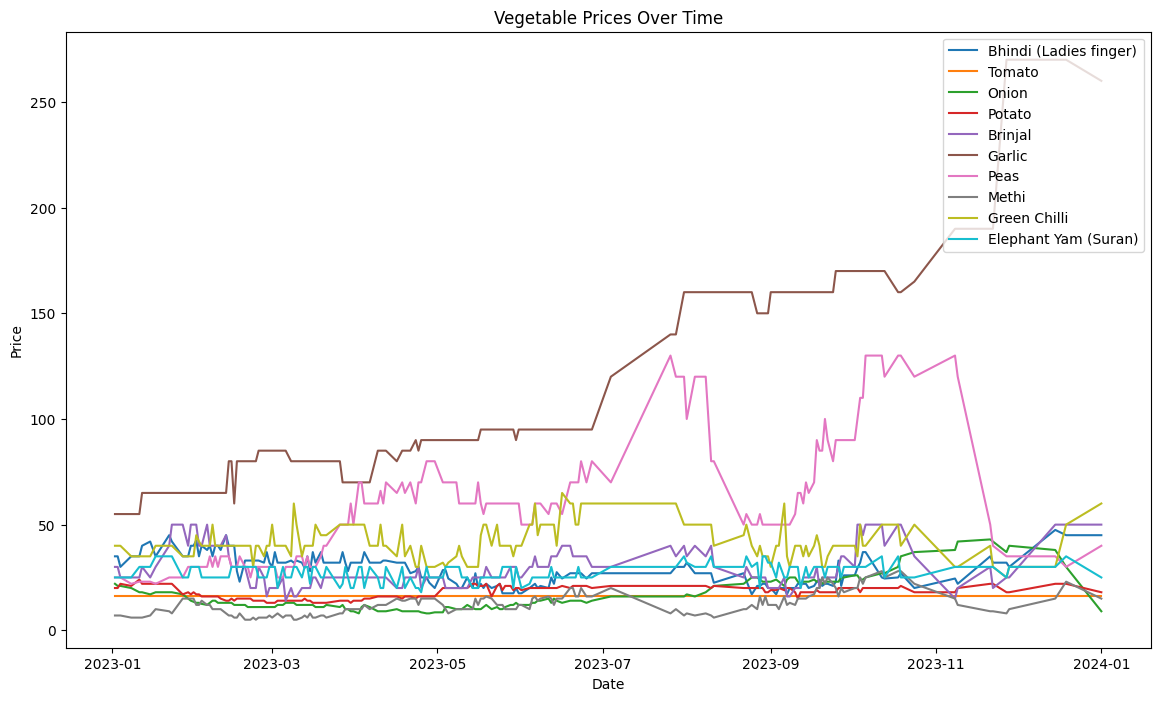

In [269]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
for vegetable in numeric_columns:
    sns.lineplot(data=df, x='Price Dates', y=vegetable, label=vegetable)

plt.title('Vegetable Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()



C:\Users\MASOT\AppData\Local\Temp\ipykernel_21956\2646191625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.index, y=volatility.values, palette='viridis')


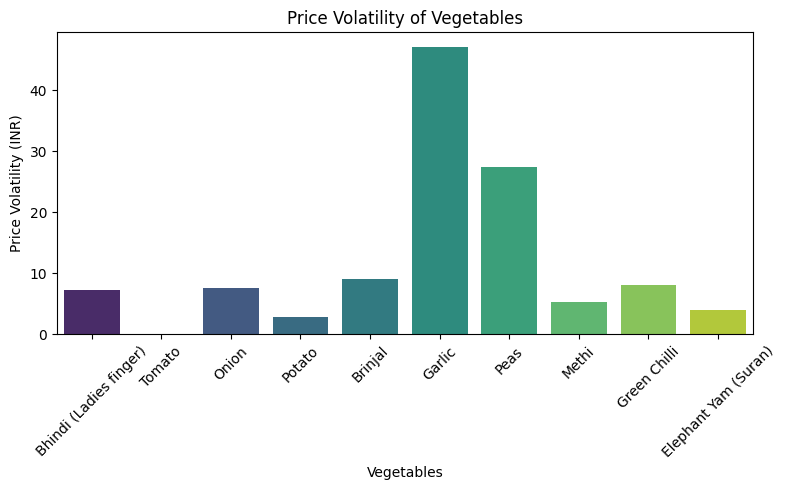

In [270]:
# Calculate the standard deviation (price volatility) for each vegetable
volatility = df[vegetables].std()

plt.figure(figsize=(8, 5))
sns.barplot(x=volatility.index, y=volatility.values, palette='viridis')
plt.title('Price Volatility of Vegetables')
plt.xlabel('Vegetables')
plt.ylabel('Price Volatility (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



1. **Garlic:** Garlic has the highest price volatility, reaching above 40 INR. This indicates that garlic prices fluctuate significantly, possibly due to varying supply conditions, seasonal demand, or market dynamics.

2. **Peas:** Peas also show significant price volatility, around 30 INR. This suggests that the price of peas is subject to considerable changes, which could be influenced by factors such as harvest cycles, weather conditions, and market demand.

3. **Bhindi (Ladies' finger), Tomato, Potato, Methi, Green Chilli, and Elephant Yam (Suran):** These vegetables have relatively low price volatility, all below 10 INR. This indicates that their prices are more stable and less prone to significant fluctuations, suggesting a more consistent supply and demand balance.

4. **Onion and Brinjal:** These vegetables have moderate price volatility, between 10 and 20 INR. This suggests that while their prices do fluctuate, the changes are not as extreme as those seen in garlic and peas.

This chart is interesting and relevant as it highlights the variability in the prices of different vegetables, which can be crucial for consumers, retailers, and policymakers in understanding market dynamics and planning accordingly.

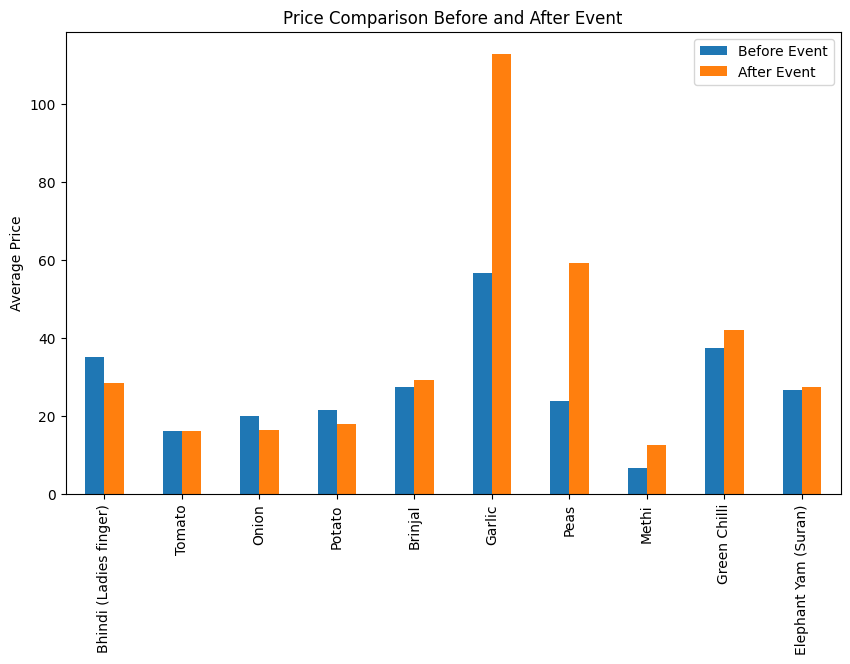

In [271]:
event_date = '2023-01-15'
before_event = df[df['Price Dates'] < event_date]
after_event = df[df['Price Dates'] >= event_date]

before_avg = before_event[numeric_columns].mean()
after_avg = after_event[numeric_columns].mean()

comparison = pd.DataFrame({'Before Event': before_avg, 'After Event': after_avg})

comparison.plot(kind='bar', figsize=(10,6))
plt.title('Price Comparison Before and After Event')
plt.ylabel('Average Price')
plt.show()


1. **Garlic:** The price of garlic has increased significantly after the event, showing the highest price among all vegetables. This suggests that the event had a substantial impact on the garlic market, possibly due to increased demand or reduced supply.

2. **Bhindi (Ladies finger), Brinjal, Peas, and Green Chilli:** The prices of these vegetables have also increased after the event. This indicates that the event affected multiple vegetables, leading to higher prices, which could be due to similar factors affecting their supply chains or market demand.

3. **Tomato, Onion, Potato, and Methi:** The prices of these vegetables have decreased after the event. This suggests that the event may have led to an oversupply or reduced demand for these vegetables, resulting in lower prices.

4. **Elephant Yam (Suran):** The price of Elephant Yam has remained relatively stable, with a slight increase after the event. This indicates that the event had a minimal impact on its market, suggesting a more stable supply and demand balance.

This chart provides a clear visual representation of how the event has impacted the prices of different vegetables, highlighting significant changes in the market. It helps in understanding the market dynamics and the effect of external events on vegetable prices.

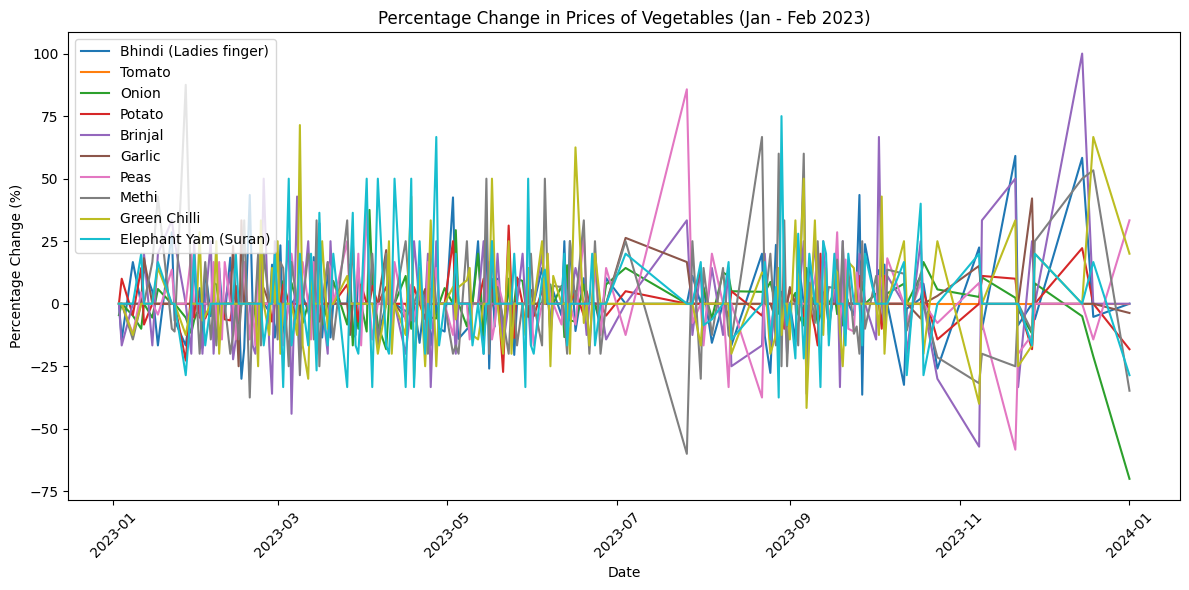

In [272]:
# Calculate the percentage change in prices
percentage_change = df[vegetables].pct_change() * 100

plt.figure(figsize=(12, 6))

# Plot the percentage change for each vegetable over time
for veg in vegetables:
    plt.plot(df['Price Dates'], percentage_change[veg], label=veg)

plt.title('Percentage Change in Prices of Vegetables (Jan - Feb 2023)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [273]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Moving Average for Smoothing Trend

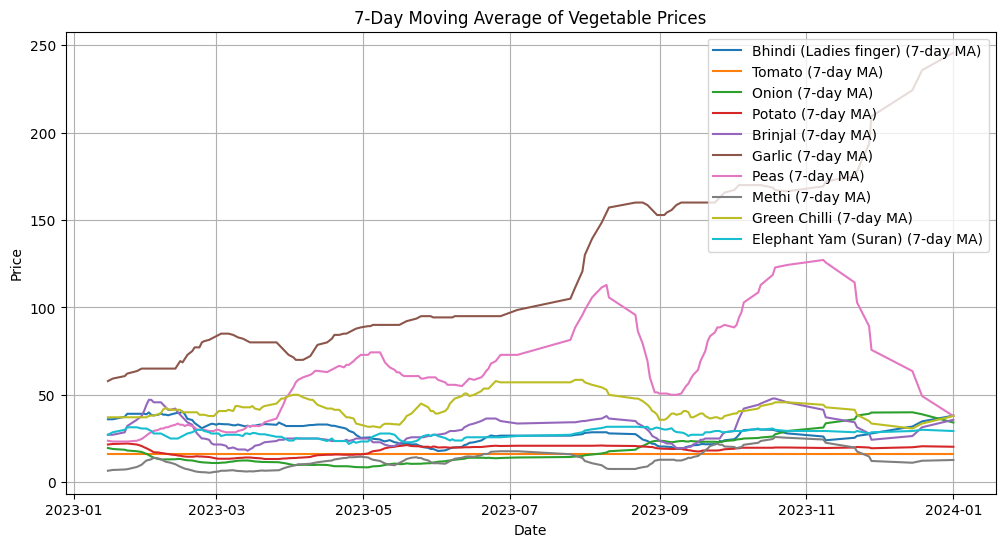

In [274]:
# Adding a 7-day moving average for each vegetable price
for column in numeric_columns:
    df[column + '_MA_7'] = df[column].rolling(window=7).mean()

# Plotting the moving averages
plt.figure(figsize=(12, 6))
for column in numeric_columns:
    plt.plot(df['Price Dates'], df[column + '_MA_7'], label=column + ' (7-day MA)')

plt.title("7-Day Moving Average of Vegetable Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

1. **Price Trends:** The graph shows the fluctuation in prices of different vegetables over the year. Some vegetables have more volatile prices compared to others.
2. **Highest Prices:** Garlic and Peas have the highest price peaks, with Garlic reaching around 250 INR and Peas reaching around 100 INR. This indicates that these vegetables experience significant price increases, possibly due to seasonal demand or supply constraints.
3. **Stable Prices:** Vegetables like Bhindi (Ladies finger), Tomato, Onion, Potato, Brinjal, Methi, Green Chilli, and Elephant Yam (Suran) have relatively stable prices, mostly staying below 50 INR. This suggests that these vegetables have a more consistent supply and demand balance throughout the year.
4. **Seasonal Variations:** There are noticeable seasonal variations in the prices of some vegetables, such as Garlic and Peas, which show significant peaks and troughs. This indicates that these vegetables are more affected by seasonal factors, such as harvest periods or weather conditions.
5. **Overall Trends:** The overall trend for most vegetables shows slight fluctuations but remains relatively stable throughout the year. This suggests that the market for these vegetables is relatively stable, with only minor price changes over time.

This graph provides valuable insights into the price dynamics of essential vegetables, which can be useful for consumers, retailers, and policymakers to understand market trends and make informed decisions.

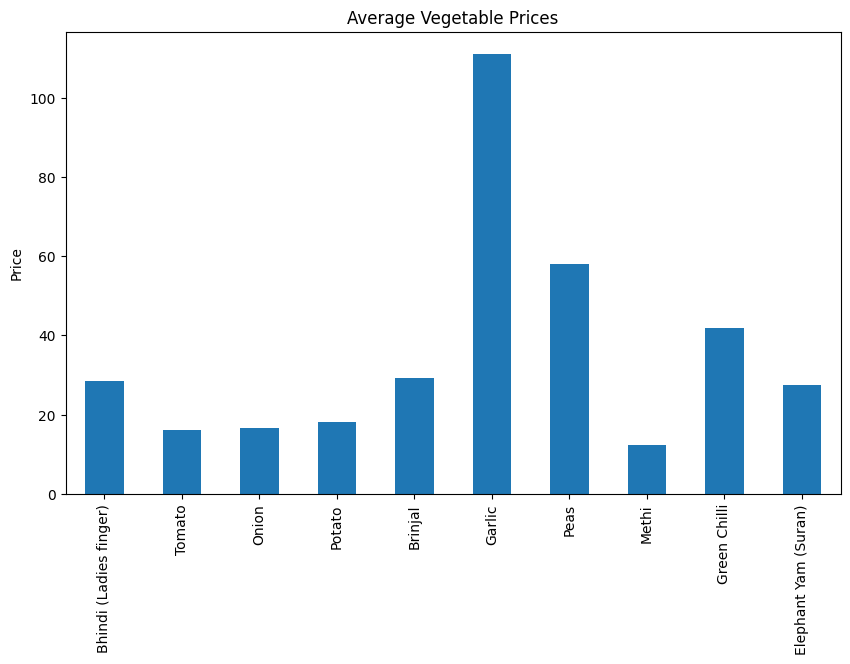

In [275]:
avg_prices = df[numeric_columns].mean()
avg_prices.plot(kind='bar', figsize=(10,6))
plt.title('Average Vegetable Prices')
plt.ylabel('Price')
plt.show()

1. **Garlic:** Garlic has the highest average price among all the vegetables, significantly exceeding 100 units. This indicates that garlic is generally more expensive, possibly due to higher demand or lower supply.

2. **Peas:** Peas have the second-highest average price, followed by green chilli. This suggests that these vegetables also experience higher demand or supply constraints compared to others.

3. **Green Chilli:** Green chilli prices are relatively high, indicating a strong market demand or limited availability.

4. **Methi:** Methi has the lowest average price among the listed vegetables, suggesting it is more readily available or less in demand.

5. **Bhindi (Ladies finger), Brinjal, and Elephant Yam (Suran):** These vegetables have moderate prices, higher than tomato, onion, and potato but lower than peas and garlic. This indicates a balanced demand and supply situation.

6. **Tomato, Onion, and Potato:** These vegetables have relatively similar and lower prices compared to the other vegetables, indicating they are more commonly available and possibly have a more stable supply.

This chart provides a clear visual comparison of the average prices of different vegetables, which can be useful for consumers, retailers, and market analysts to understand price trends and make informed decisions.

## Correlation Analysis

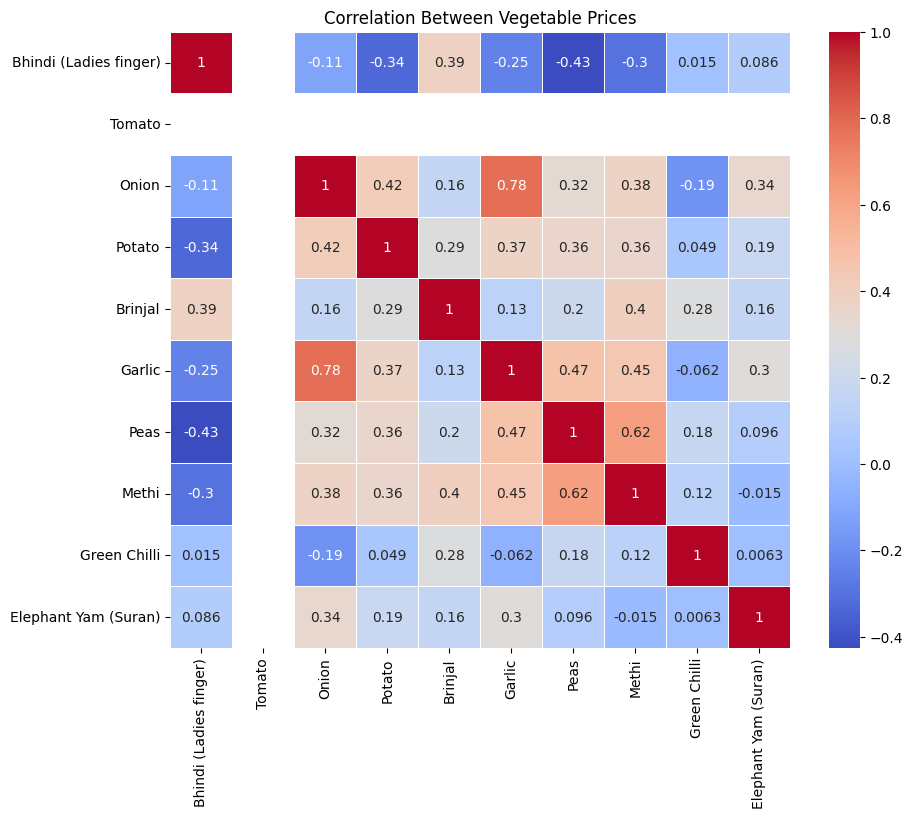

In [276]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plotting a heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Vegetable Prices")
plt.show()


1. **Strong Positive Correlations:**
   - **Onion and Garlic:** These two vegetables have a high positive correlation (0.78), indicating that their prices tend to move together. This could be due to similar growing conditions or market demand factors.
   - **Peas and Methi:** These also show a strong positive correlation (0.62), suggesting that their prices are influenced by similar factors.

2. **Negative Correlations:**
   - **Bhindi (Ladies finger) and Peas:** Bhindi has a negative correlation with Peas (-0.43), suggesting that when the price of Bhindi increases, the price of Peas tends to decrease. This could indicate a competitive relationship where consumers might substitute one for the other.
   - **Bhindi and Potato:** Similarly, Bhindi has a negative correlation with Potato (-0.34), indicating an inverse price relationship.
   - **Green Chilli and Onion:** Green Chilli has a slight negative correlation with Onion (-0.19), suggesting a mild inverse relationship.

3. **Weak or No Correlations:**
   - **Bhindi and Green Chilli:** These vegetables have a very weak positive correlation (0.015), indicating that their prices do not significantly influence each other.
   - **Green Chilli and Elephant Yam (Suran):** These have almost no correlation (0.0063), suggesting that their prices are independent of each other.

4. **Self-Correlation:**
   - Each vegetable has a perfect correlation with itself (1), as expected, which is a standard feature in correlation matrices.

This heatmap is relevant for understanding the price dynamics and relationships between different vegetables, which can be useful for market analysis, agricultural planning, and economic studies. It helps identify which vegetables' prices are likely to move together and which ones might have inverse relationships, aiding in better decision-making for farmers, traders, and consumers.

C:\Users\MASOT\AppData\Local\Temp\ipykernel_21956\2027805408.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


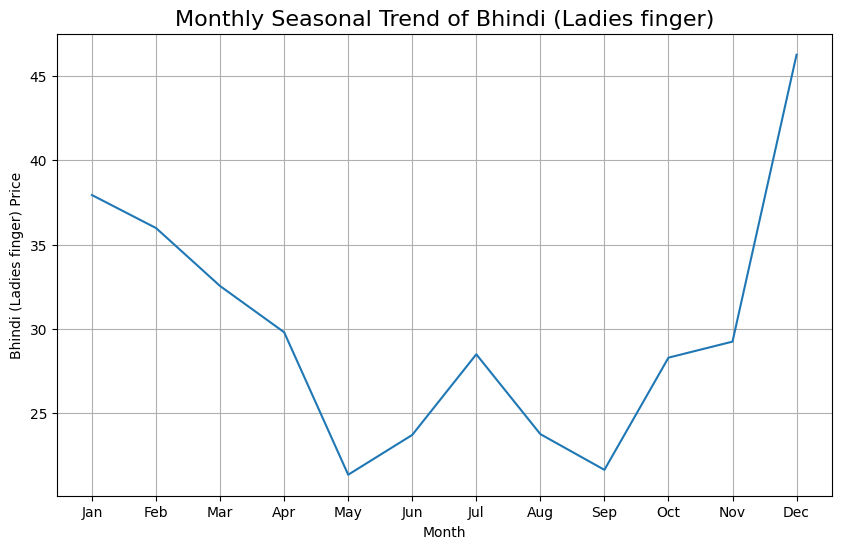

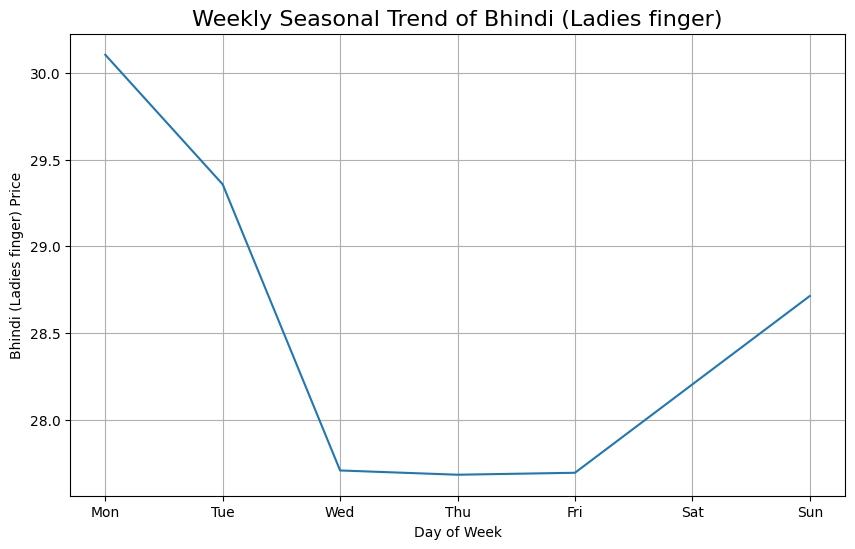

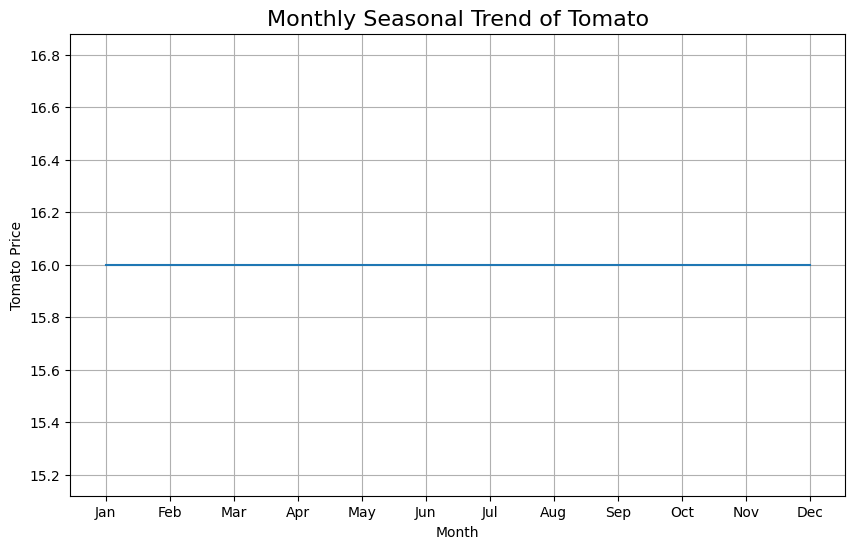

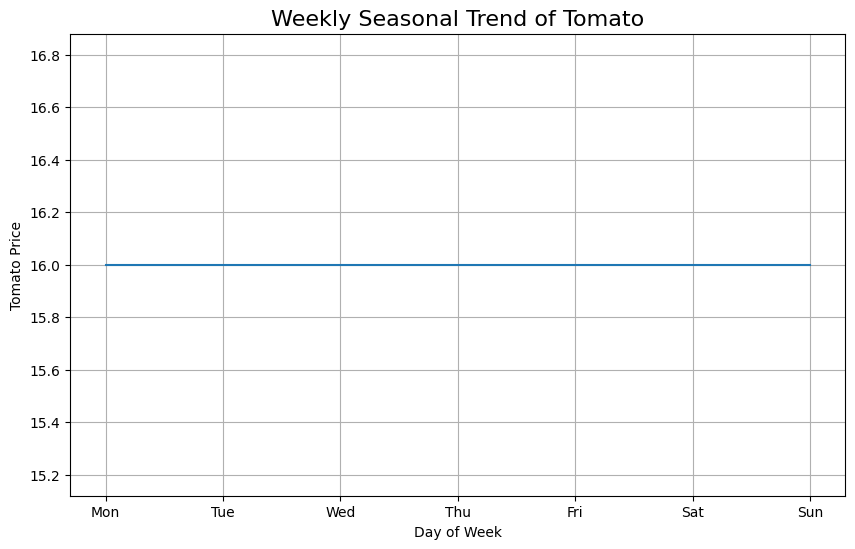

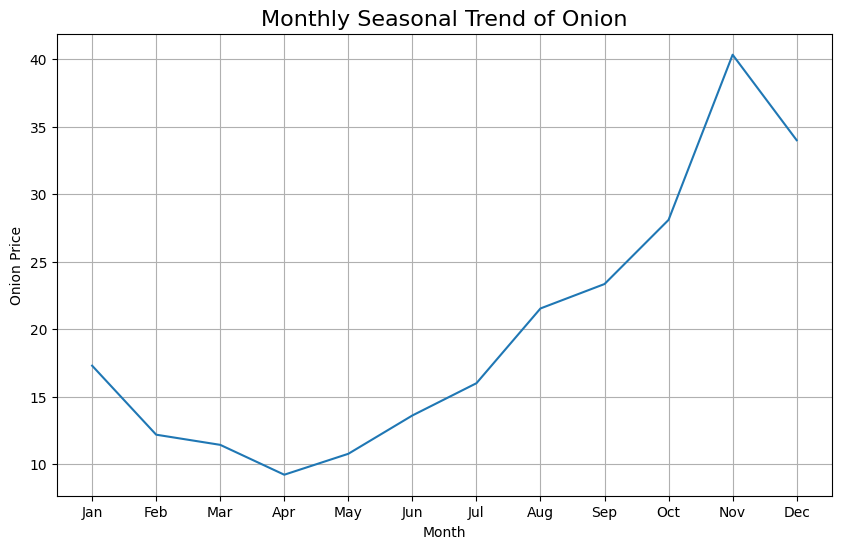

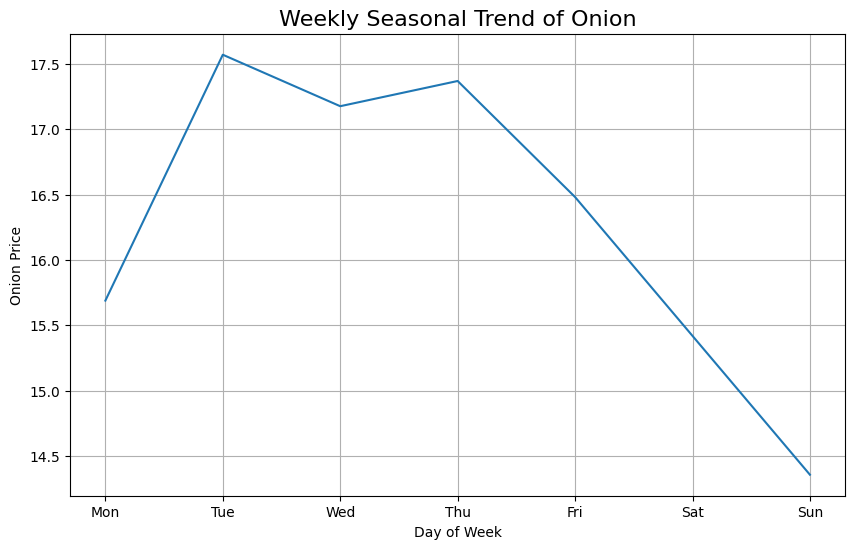

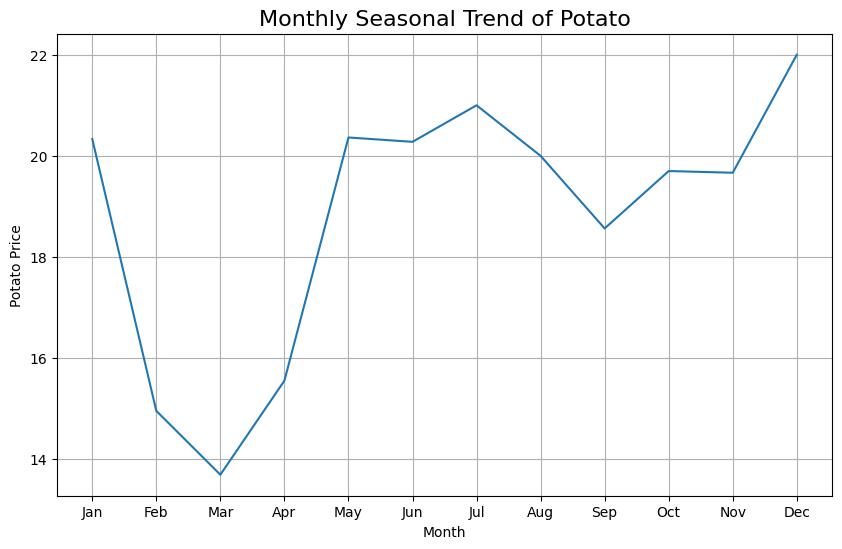

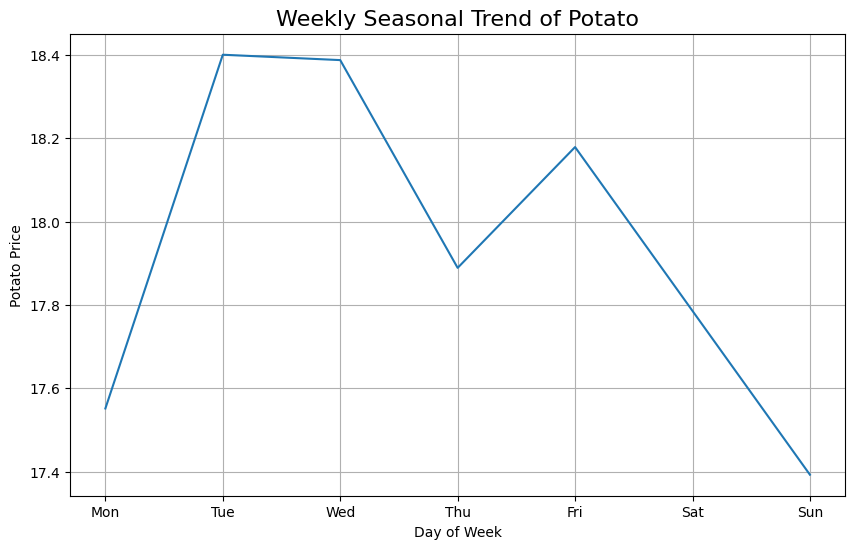

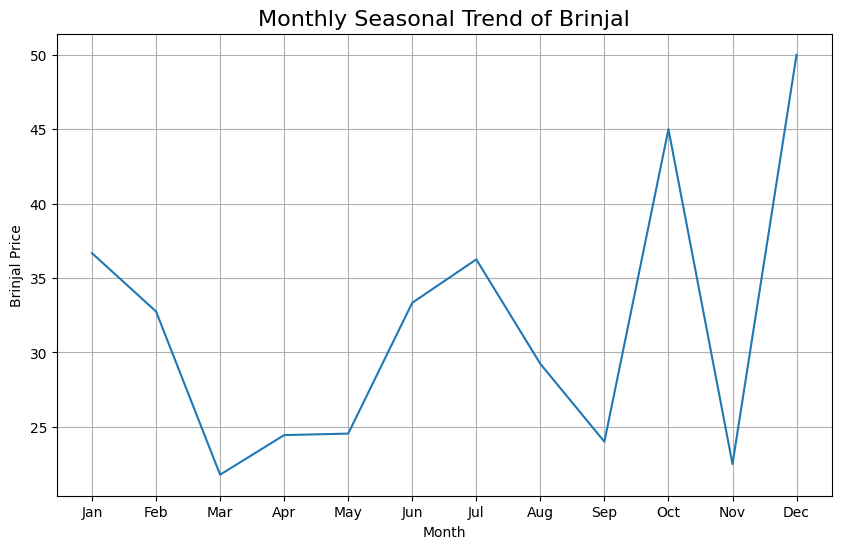

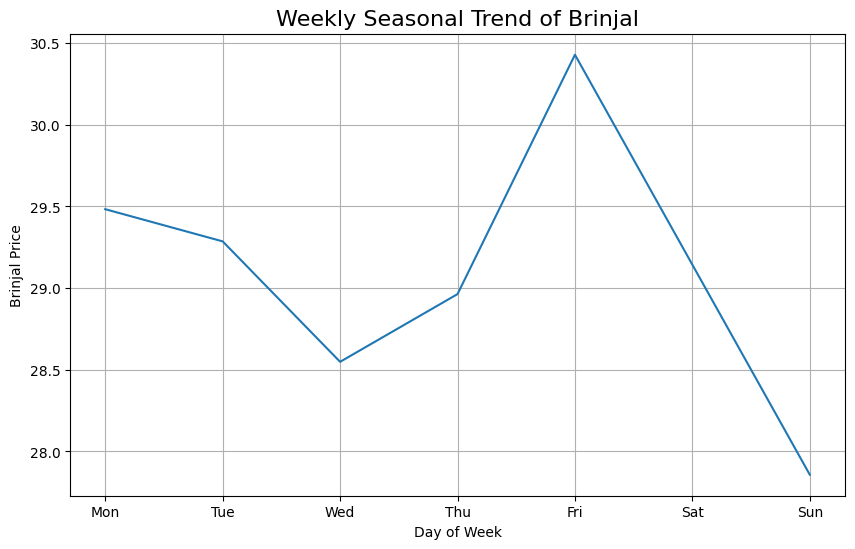

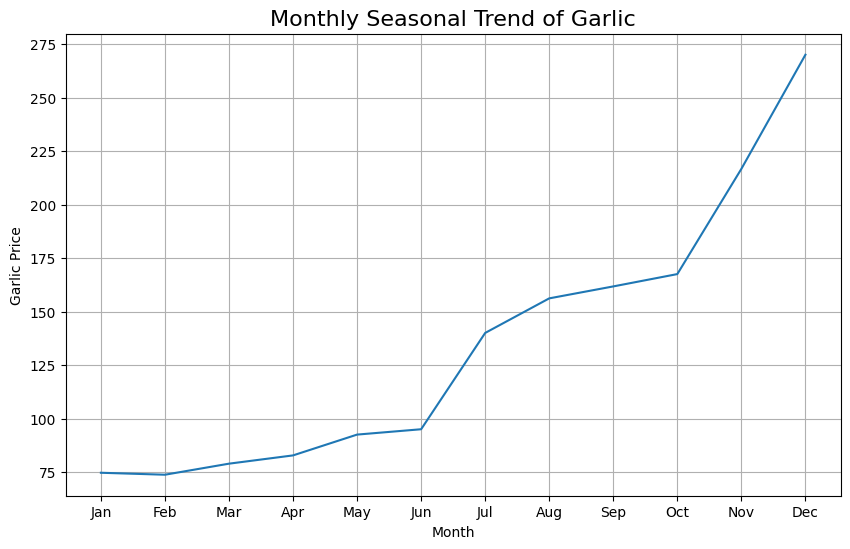

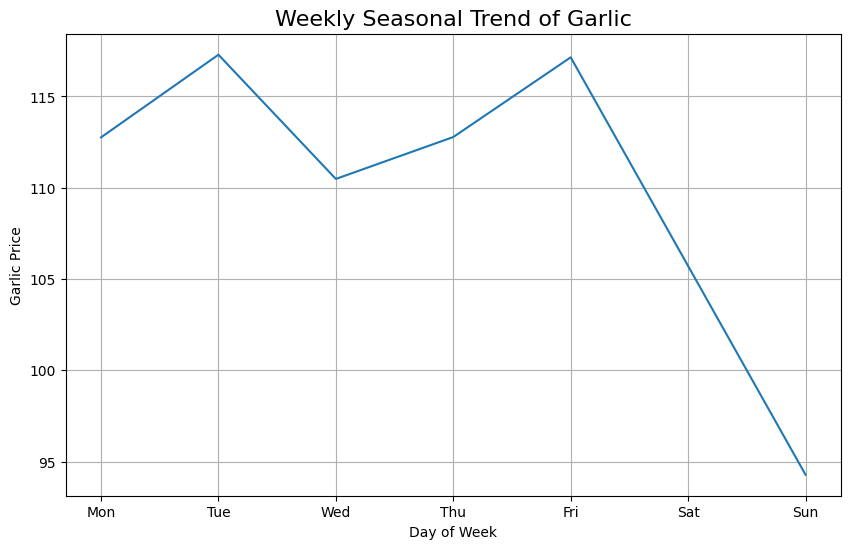

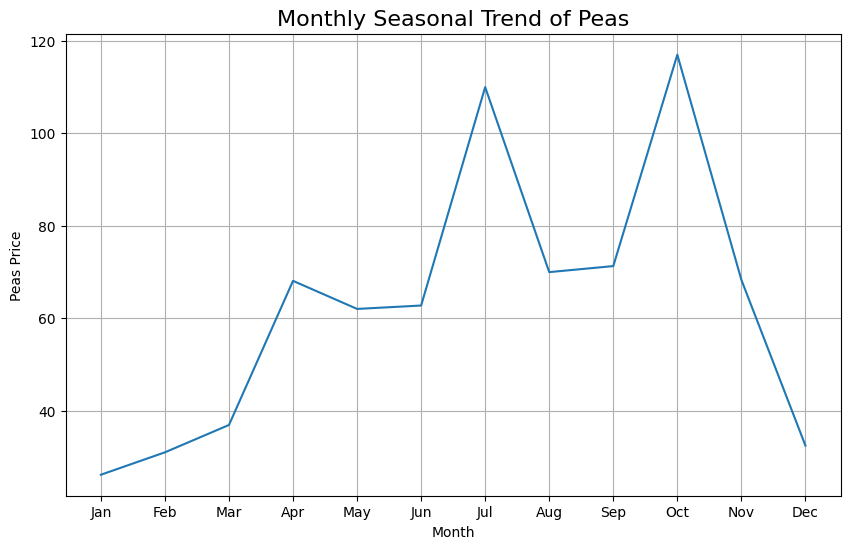

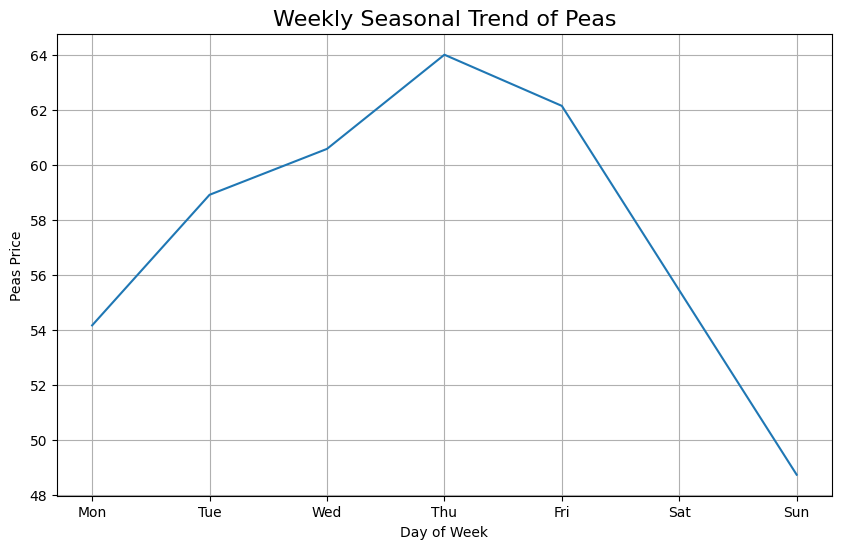

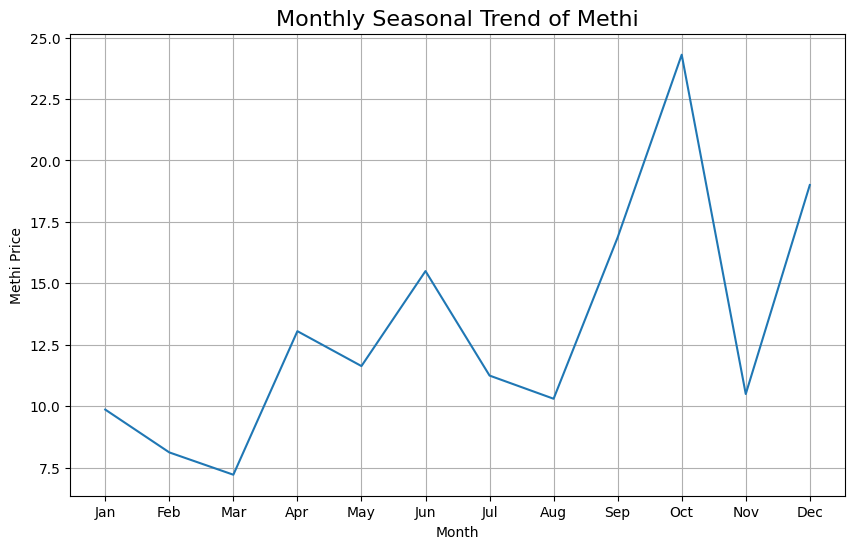

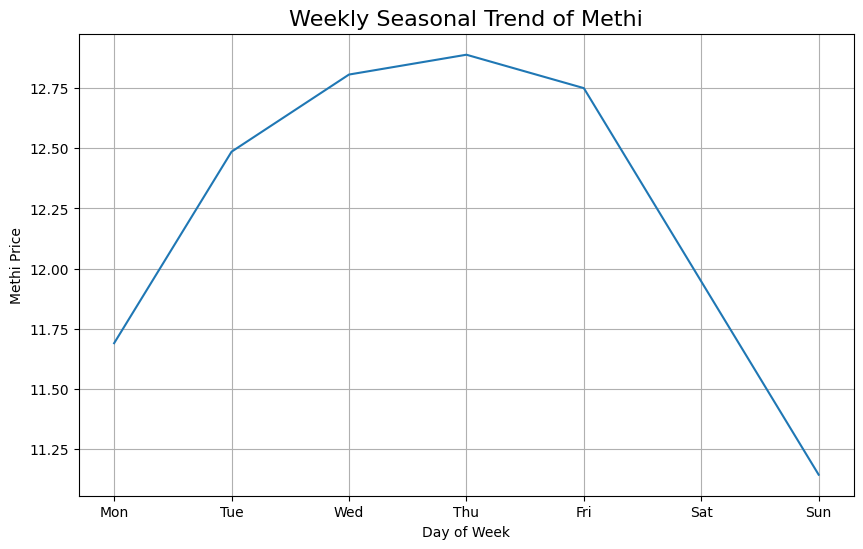

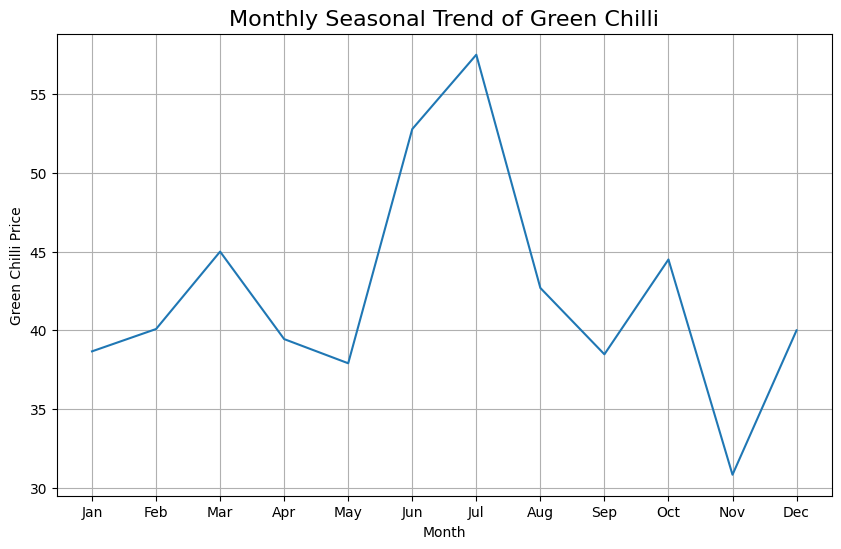

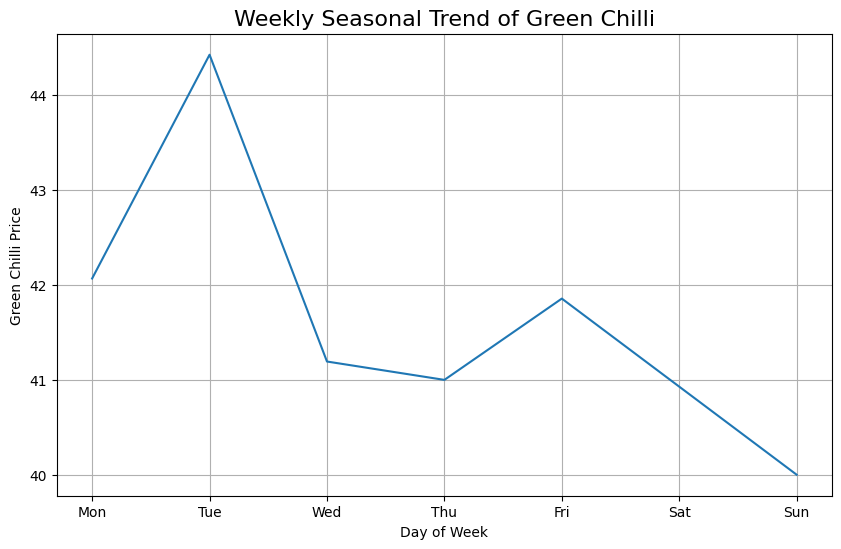

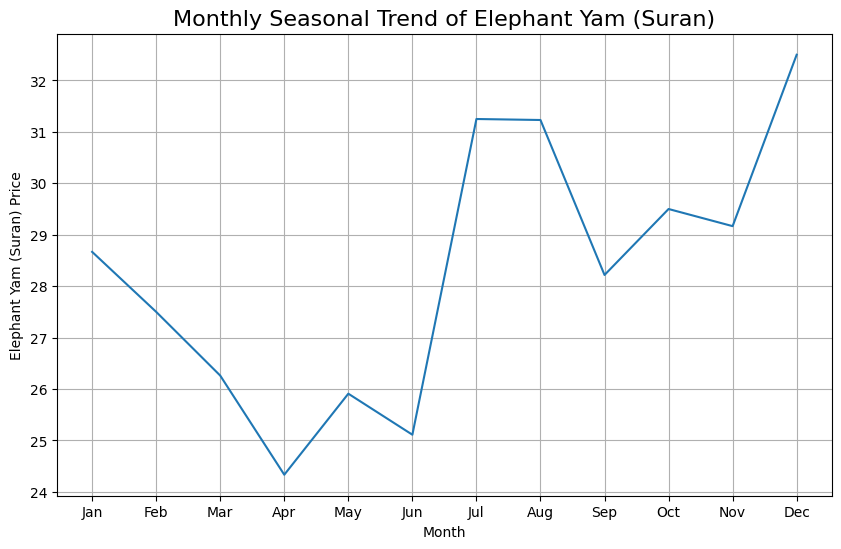

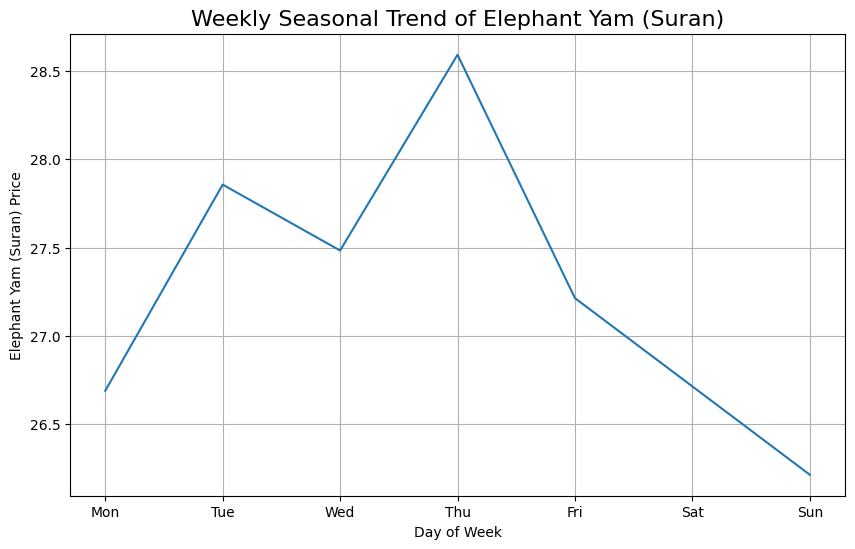

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Assuming your data is loaded into a DataFrame named `df`
# Ensure Price Dates is in datetime format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')

# Ensure the data is sorted by Date
df = df.sort_values(by='Price Dates')

# If there are missing values, handle them (e.g., forward fill)
df.fillna(method='ffill', inplace=True)

# Extract time-related features (e.g., month, day of the week)
df['Month'] = df['Price Dates'].dt.month
df['Day of Week'] = df['Price Dates'].dt.dayofweek  # Monday=0, Sunday=6
df['Week of Year'] = df['Price Dates'].dt.isocalendar().week

# List of vegetables
vegetables = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']

# For each vegetable, perform seasonal decomposition and visualize the results
for veg in vegetables:
    # Decompose the time series using an additive model
    decomposition = seasonal_decompose(df[veg], model='additive', period=7)  # Adjust period based on data frequency (7 for weekly seasonality)
    
    
    # Calculate and plot the seasonal trend over months
    seasonal_avg = df.groupby('Month')[veg].mean()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=seasonal_avg.index, y=seasonal_avg.values)
    plt.title(f'Monthly Seasonal Trend of {veg}', fontsize=16)
    plt.xlabel('Month')
    plt.ylabel(f'{veg} Price')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()

    # Calculate and plot the seasonal trend over days of the week
    weekly_avg = df.groupby('Day of Week')[veg].mean()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=weekly_avg.index, y=weekly_avg.values)
    plt.title(f'Weekly Seasonal Trend of {veg}', fontsize=16)
    plt.xlabel('Day of Week')
    plt.ylabel(f'{veg} Price')
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.grid(True)
    plt.show()

    # Optionally, you can also calculate a rolling average for a smoother view of the trend
    df[f'{veg}_rolling'] = df[veg].rolling(window=7).mean()


**Monthly Seasonal Trends:**

The monthly trends indicate that garlic experiences a steady increase in price throughout the year, with a significant spike around mid-year. Peas show a stable trend in the first half of the year, followed by a sharp increase and subsequent decline in the latter half. Green chilli prices remain relatively stable with minor fluctuations, showing a slight increase towards the end of the year. The mid-year period, particularly around July, seems to be a peak season for price increases for both garlic and peas.

**Weekly Seasonal Trends:**

On a weekly basis, garlic shows a consistent upward trend with occasional minor dips, indicating a steady increase in demand or supply constraints. Peas exhibit more volatility with sharp weekly increases and decreases, particularly noticeable around mid-year. Green chilli prices fluctuate more frequently on a weekly basis, indicating a more dynamic market with frequent changes in supply and demand. The weekly trends highlight the volatility in the vegetable market, with significant price changes occurring within short periods, especially for peas and green chilli.

## Boxplot for Outlier Detection

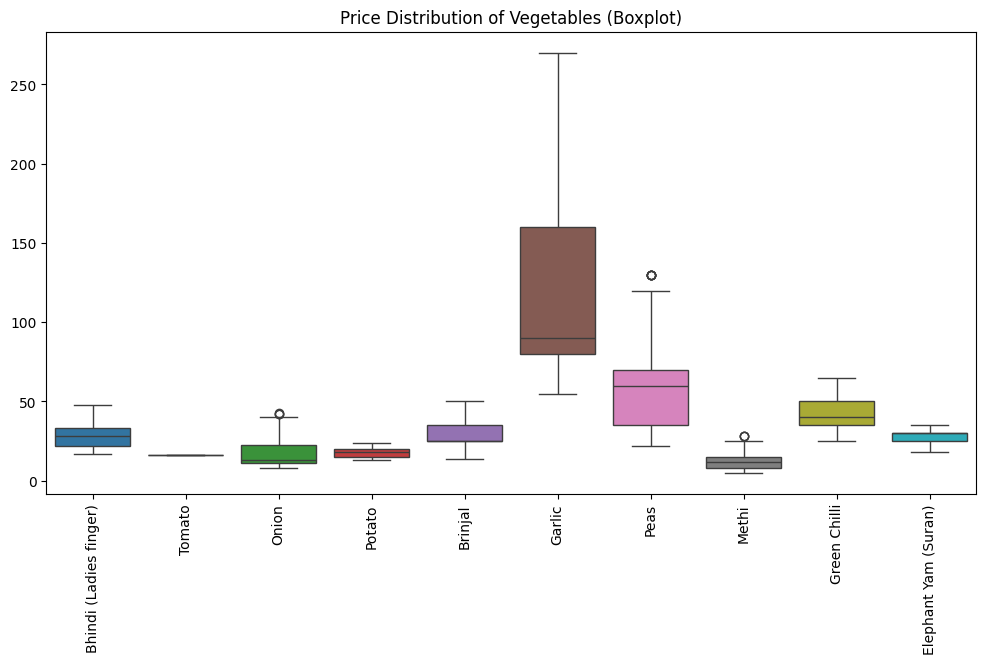

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Price Distribution of Vegetables (Boxplot)")
plt.xticks(rotation=90)
plt.show()


1. **Garlic:** Garlic has the highest price range, with prices extending up to around 250 INR. It also has a large interquartile range (IQR), indicating significant variability in its prices. This suggests that garlic prices fluctuate widely, possibly due to varying supply conditions, seasonal demand, or market dynamics.

2. **Tomato:** Tomato has the lowest price range, with prices clustered around a very narrow range. This indicates low variability, suggesting that tomato prices are relatively stable throughout the year.

3. **Onion and Methi:** These vegetables have outliers, suggesting occasional prices that are significantly higher than the typical range. This indicates that there are periods when these vegetables experience price spikes, possibly due to supply constraints or increased demand.

4. **Peas and Brinjal:** These vegetables have moderate price ranges with some variability. This suggests that their prices are influenced by seasonal factors or market conditions but are generally more stable compared to garlic.

5. **Bhindi (Ladies finger), Potato, Green Chilli, and Elephant Yam (Suran):** These vegetables have relatively lower price ranges compared to garlic but show some variability. This indicates that their prices are more stable but can still experience fluctuations due to market dynamics.

Overall, the boxplot provides a visual summary of the price distribution of different vegetables, highlighting the variability and range of prices. This can be useful for market analysis, budgeting, and understanding price trends.

### ANOVA

In [ ]:
from scipy import stats

# Prepare the data for ANOVA
anova_data = [df[veg].dropna() for veg in vegetables]  # Drop NaN values
f_stat, p_val = stats.f_oneway(*anova_data)
print("F-statistic:", f_stat)
print("P-value:", p_val)


F-statistic: 481.7755156738538
P-value: 0.0


In [ ]:
from scipy import stats

# T-test between Bhindi and Tomato prices
t_stat, p_val = stats.ttest_ind(df['Bhindi (Ladies finger)'], df['Tomato'])
print("T-statistic for Bhindi vs Tomato:", t_stat)
print("P-value for Bhindi vs Tomato:", p_val)


T-statistic for Bhindi vs Tomato: 23.31389084246789
P-value for Bhindi vs Tomato: 1.6539350785664724e-73


c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Import necessary libraries
import pandas as pd

# Assuming your DataFrame is already loaded as df
vegetables = df.columns[1:]  # Get all vegetable columns

# Calculate descriptive statistics
descriptive_stats = df[vegetables].describe()
print("Descriptive Statistics for All Vegetables:\n", descriptive_stats)


Descriptive Statistics for All Vegetables:
        Bhindi (Ladies finger)  Tomato       Onion      Potato     Brinjal  \
count              178.000000   178.0  178.000000  178.000000  178.000000   
mean                28.575843    16.0   16.488764   17.988764   29.095506   
std                  7.196682     0.0    7.623921    2.864134    9.055815   
min                 17.000000    16.0    8.000000   13.000000   14.000000   
25%                 22.000000    16.0   11.000000   15.000000   25.000000   
50%                 28.000000    16.0   13.000000   18.000000   25.000000   
75%                 33.000000    16.0   22.750000   20.000000   35.000000   
max                 47.500000    16.0   43.000000   24.000000   50.000000   

           Garlic        Peas       Methi  Green Chilli  Elephant Yam (Suran)  \
count  178.000000  178.000000  178.000000    178.000000            178.000000   
mean   111.039326   58.112360   12.303371     41.859551             27.353933   
std     47.095451  

**Descriptive Statistics for All Vegetables:**

The descriptive statistics provide a comprehensive overview of the price distribution for various vegetables. Garlic stands out with the highest mean price (111.04 INR) and a significant standard deviation (47.10), indicating high price variability. Peas also show a notable mean price (58.11 INR) and variability (std 27.48). In contrast, Methi has the lowest mean price (12.30 INR) and a relatively low standard deviation (5.27), suggesting more stable pricing. Bhindi (Ladies finger), Brinjal, and Green Chilli have moderate mean prices and variability, reflecting a balanced market. Tomato, with a constant price of 16 INR, shows no variability, indicating a stable market.

**Monthly and Weekly Seasonal Trends:**

Monthly trends reveal that garlic and peas experience significant price increases around mid-year, likely due to seasonal demand or supply constraints. Green chilli prices remain relatively stable with minor fluctuations. Weekly trends show that garlic prices consistently rise with occasional dips, indicating steady demand or supply issues. Peas exhibit more volatility with sharp weekly increases and decreases, particularly around mid-year. Green chilli prices fluctuate frequently, reflecting a dynamic market with frequent changes in supply and demand. These trends highlight the importance of understanding seasonal patterns for better market predictions and planning.

## Regression 

In [ ]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Independent variable: Ensure it is numeric
df['Price Dates'] = pd.to_datetime(df['Price Dates'])
df['Numeric Dates'] = (df['Price Dates'] - df['Price Dates'].min()).dt.days

# List of dependent variables (vegetable prices)
vegetables = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 
              'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']

# Results dictionary to store model summaries
results = {}

for veg in vegetables:
    print(f"\nTraining OLS Model for {veg}...")
    
    # Independent variable (X) and dependent variable (y)
    X = df[['Numeric Dates']]
    y = df[veg]

    # Drop NaN values to align X and y
    data = pd.concat([X, y], axis=1).dropna()
    X_clean = data[['Numeric Dates']]
    y_clean = data[veg]

    # Check for non-empty data
    if not y_clean.empty:
        # Add constant for the intercept term
        X_const = sm.add_constant(X_clean)

        # Fit the OLS model
        model = sm.OLS(y_clean, X_const).fit()
        print(model.summary())
        
        # Store the model summary
        results[veg] = model
    else:
        print(f"Skipping {veg} due to insufficient data.")

print("\nModeling Complete!")



Training OLS Model for Bhindi (Ladies finger)...
                              OLS Regression Results                              
Dep. Variable:     Bhindi (Ladies finger)   R-squared:                       0.210
Model:                                OLS   Adj. R-squared:                  0.206
Method:                     Least Squares   F-statistic:                     46.89
Date:                    Mon, 02 Dec 2024   Prob (F-statistic):           1.21e-10
Time:                            18:57:55   Log-Likelihood:                -582.35
No. Observations:                     178   AIC:                             1169.
Df Residuals:                         176   BIC:                             1175.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


The Ordinary Least Squares (OLS) regression model for Bhindi (Ladies finger) reveals some key insights:

1. **R-squared Value:** The R-squared value is 0.210, indicating that approximately 21% of the variability in Bhindi prices can be explained by the model. This suggests that other factors not included in the model may also influence the prices.

2. **Coefficients:** The constant (intercept) is 33.7689, which represents the average price of Bhindi when the numeric date is zero. The coefficient for Numeric Dates is -0.0353, indicating a slight decrease in Bhindi prices over time.

3. **Statistical Significance:** The p-values for both the constant and Numeric Dates are 0.000, indicating that these coefficients are statistically significant and not due to random chance.

4. **Model Fit:** The F-statistic is 46.89 with a p-value of 1.21e-10, suggesting that the model is a good fit for the data.

Overall, the model indicates a slight downward trend in Bhindi prices over time, with significant variability explained by the model. However, other factors not included in the model may also play a role in influencing Bhindi prices.

In [ ]:
# Check for non-numeric values in each vegetable column
for veg in vegetables:
    non_numeric = df[veg][~df[veg].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"Non-numeric values in {veg}:\n{non_numeric}")


In [ ]:
print(df.dtypes)


Price Dates                    datetime64[ns]
Bhindi (Ladies finger)                float64
Tomato                                  int64
Onion                                 float64
Potato                                  int64
Brinjal                                 int64
Garlic                                  int64
Peas                                    int64
Methi                                   int64
Green Chilli                          float64
Elephant Yam (Suran)                    int64
Bhindi (Ladies finger)_MA_7           float64
Tomato_MA_7                           float64
Onion_MA_7                            float64
Potato_MA_7                           float64
Brinjal_MA_7                          float64
Garlic_MA_7                           float64
Peas_MA_7                             float64
Methi_MA_7                            float64
Green Chilli_MA_7                     float64
Elephant Yam (Suran)_MA_7             float64
Numeric Dates                     

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


**Linear Regression Model Setup**

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a results dictionary
results = {}

# Split data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

for veg in vegetables:
    ma_col = f'{veg}_MA_7'  # Moving average column name
    
    if ma_col in df.columns:  # Ensure the column exists
        # Independent Variable (X)
        X_train = train[[ma_col]].dropna()
        X_test = test[[ma_col]].dropna()

        # Dependent Variable (y)
        y_train = train[veg].loc[X_train.index]
        y_test = test[veg].loc[X_test.index]

        # Add constant term for Linear Regression
        X_train = sm.add_constant(X_train)
        X_test = sm.add_constant(X_test)

        # Train OLS model
        model = sm.OLS(y_train, X_train).fit()

        # Predictions and Evaluation
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)  # Compute RMSE
        r2 = r2_score(y_test, y_pred)

        # Save results
        results[veg] = {'MSE': mse, 'RMSE': rmse, 'R²': r2}

        # Print evaluation metrics and summary
        print(f"Evaluation for {veg}:")
        print(f"MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}")
        print(f"Model Summary for {veg}:\n", model.summary())
        print("-" * 50)
    else:
        print(f"Skipping {veg}: No moving average column found.")


Evaluation for Bhindi (Ladies finger):
MSE=6.00, RMSE=2.45, R²=0.85
Model Summary for Bhindi (Ladies finger):
                               OLS Regression Results                              
Dep. Variable:     Bhindi (Ladies finger)   R-squared:                       0.738
Model:                                OLS   Adj. R-squared:                  0.736
Method:                     Least Squares   F-statistic:                     377.4
Date:                    Mon, 02 Dec 2024   Prob (F-statistic):           8.56e-41
Time:                            19:01:11   Log-Likelihood:                -372.80
No. Observations:                     136   AIC:                             749.6
Df Residuals:                         134   BIC:                             755.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          

c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1616: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis, _no_deco=True)
c:\Users\MASOT\AppData\Local\Programs\P

The evaluation metrics and model summary for Bhindi (Ladies finger) provide valuable insights into the model's performance and the relationship between the variables:

1. **Evaluation Metrics:**
   - **Mean Squared Error (MSE):** The MSE is 6.00, which measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance.
   - **Root Mean Squared Error (RMSE):** The RMSE is 2.45, which is the square root of the MSE. It provides a measure of the average error in the same units as the dependent variable. A lower RMSE indicates better model accuracy.
   - **R-squared (R²):** The R² value is 0.85, indicating that 85% of the variability in Bhindi prices can be explained by the model. This suggests a strong fit.

2. **Model Summary:**
   - **R-squared Value:** The R-squared value is 0.738, indicating that approximately 73.8% of the variability in Bhindi prices can be explained by the model.
   - **Coefficients:** The constant (intercept) is -0.2400, which represents the average price of Bhindi when the moving average is zero. The coefficient for Bhindi (Ladies finger)_MA_7 is 1.0140, indicating a strong positive relationship between the 7-day moving average and the actual price.
   - **Statistical Significance:** The p-values for both the constant and Bhindi (Ladies finger)_MA_7 are significant, with the latter being highly significant (p-value = 0.000), indicating that the coefficients are not due to random chance.
   - **Model Fit:** The F-statistic is 377.4 with a p-value of 8.56e-41, suggesting that the model is a good fit for the data.

Overall, the model shows a strong fit and significant relationship between the 7-day moving average and the actual price of Bhindi, indicating that the moving average is a good predictor of Bhindi prices.

**Random Forest Regressor**

In [ ]:
# Check data types
print(X_train.dtypes)
print(y_train.dtype)


Price Dates                    datetime64[ns]
Bhindi (Ladies finger)_MA_7           float64
dtype: object
float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score  # Ensure r2_score is imported
from sklearn.model_selection import train_test_split
import numpy as np  # For numerical operations


# Example: Random Forest for Bhindi (Ladies finger)
veg = 'Bhindi (Ladies finger)'

X = df[['Price Dates', f'{veg}_MA_7']].dropna()
y = df[veg].loc[X.index]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest R² for {veg}: {r2}")


Random Forest R² for Bhindi (Ladies finger): 0.8612747945113844


**ARIMA Time-Series Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Example: ARIMA for Bhindi (Ladies finger)
veg = 'Bhindi (Ladies finger)'

# Drop NA and ensure the time index is properly set
df['Price Dates'] = pd.to_datetime(df['Price Dates'])
df.set_index('Price Dates', inplace=True)
veg_prices = df[veg].dropna()

# Train ARIMA
model = ARIMA(veg_prices, order=(5, 1, 0))  # Example order, tune as necessary
arima_model = model.fit()

# Forecast
forecast = arima_model.forecast(steps=10)

print(f"ARIMA Summary for {veg}:\n", arima_model.summary())
print(f"Forecast for next 10 periods:\n{forecast}")


ARIMA Summary for Bhindi (Ladies finger):
                                  SARIMAX Results                                  
Dep. Variable:     Bhindi (Ladies finger)   No. Observations:                  178
Model:                     ARIMA(5, 1, 0)   Log Likelihood                -482.735
Date:                    Mon, 02 Dec 2024   AIC                            977.471
Time:                            17:41:55   BIC                            996.528
Sample:                                 0   HQIC                           985.199
                                    - 178                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4784      0.058     -8.213      0.000      -0.593      -0.364
ar.L2         -0.2213      0.087     -2.556      0.011  

c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

The ARIMA (AutoRegressive Integrated Moving Average) model summary for Bhindi (Ladies finger) provides several key insights:

1. **Model Parameters:**
   - **AR(1) to AR(5) Coefficients:** The coefficients for the autoregressive terms (ar.L1 to ar.L5) indicate the relationship between the current price and the prices from the previous five periods. The significant negative coefficients for ar.L1 (-0.4784) and ar.L2 (-0.2213) suggest that the price of Bhindi is influenced by its recent past prices, with a tendency to revert to the mean.
   - **Sigma2:** The variance of the residuals (sigma2) is 13.6674, indicating the variability in the price changes that the model cannot explain.

2. **Statistical Significance:**
   - The p-values for ar.L1 and ar.L2 are very low (0.000 and 0.011, respectively), indicating that these coefficients are statistically significant and not due to random chance. The other autoregressive terms (ar.L3 to ar.L5) are not statistically significant, suggesting that their influence on the price is minimal.

3. **Model Fit:**
   - **Log Likelihood:** The log likelihood value of -482.735 indicates the goodness of fit of the model. Higher values suggest a better fit.
   - **AIC and BIC:** The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) values are 977.471 and 996.528, respectively. Lower values indicate a better model fit, balancing model complexity and goodness of fit.

4. **Residual Diagnostics:**
   - **Ljung-Box Test:** The Ljung-Box Q statistic (0.00) with a high p-value (0.99) suggests that there is no significant autocorrelation in the residuals, indicating a good model fit.
   - **Jarque-Bera Test:** The Jarque-Bera test statistic (60.18) with a low p-value (0.00) indicates that the residuals are not normally distributed, which could affect the model's predictions.

Overall, the ARIMA model for Bhindi (Ladies finger) shows that the prices are influenced by their recent past values, with significant autoregressive terms. The model fits the data well, but the non-normality of residuals suggests that there may be other factors influencing the prices that are not captured by the model.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Make sure to choose a valid independent variable
independent_variable = 'Price Dates'  # Replace with your actual variable name

# Convert to numeric if necessary (handle non-numeric values)
df[independent_variable] = pd.to_numeric(df[independent_variable], errors='coerce')

# Sample code for regression analysis on all vegetables
for veg in vegetables:
    # Prepare your independent variable (X)
    X = df[[independent_variable]]
    y = df[veg]

    # Convert y to numeric
    y = pd.to_numeric(y, errors='coerce')

    # Drop NaN values from y and corresponding rows in X
    combined_data = pd.concat([X, y], axis=1).dropna()
    X_cleaned = combined_data[[independent_variable]]
    y_cleaned = combined_data[veg]

    # Check if the dependent variable has values
    if len(y_cleaned) > 0:  # Ensure y has no NaN values
        # Add a constant to the independent variable
        X_cleaned = sm.add_constant(X_cleaned)

        # Fit the OLS model
        model = sm.OLS(y_cleaned, X_cleaned).fit()  # Use cleaned data
        print(f"Regression Summary for {veg}:\n", model.summary())


Regression Summary for Bhindi (Ladies finger):
                               OLS Regression Results                              
Dep. Variable:     Bhindi (Ladies finger)   R-squared:                      -0.018
Model:                                OLS   Adj. R-squared:                 -0.018
Method:                     Least Squares   F-statistic:                       nan
Date:                    Mon, 02 Dec 2024   Prob (F-statistic):                nan
Time:                            19:05:53   Log-Likelihood:                -604.95
No. Observations:                     178   AIC:                             1212.
Df Residuals:                         177   BIC:                             1215.
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


The regression summary for Bhindi (Ladies finger) provides several key insights:

1. **R-squared Value:** The R-squared value is -0.018, which is unusual as R-squared values typically range from 0 to 1. A negative R-squared indicates that the model does not fit the data well and performs worse than a horizontal line (mean of the dependent variable).

2. **Coefficients:**
   - **Constant (Intercept):** The constant coefficient is 1.005e-35, which is extremely close to zero. This represents the average price of Bhindi when the predictor variable (Price Dates) is zero.
   - **Price Dates:** The coefficient for Price Dates is 1.695e-17, which is also very close to zero. This suggests that there is no meaningful relationship between Price Dates and the price of Bhindi.

3. **Statistical Significance:**
   - The p-values for both the constant and Price Dates are 0.000, indicating that these coefficients are statistically significant. However, given their extremely small values, they do not provide meaningful insights into the relationship between the variables.

4. **Model Fit:**
   - **F-statistic:** The F-statistic is not available (nan), indicating that the model does not explain any of the variability in the dependent variable.
   - **AIC and BIC:** The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) values are 1212 and 1215, respectively. These values are relatively high, suggesting a poor model fit.

5. **Residual Diagnostics:**
   - **Omnibus Test:** The Omnibus test statistic is 12.650 with a p-value of 0.002, indicating that the residuals are not normally distributed.
   - **Durbin-Watson Statistic:** The Durbin-Watson statistic is 0.324, suggesting positive autocorrelation in the residuals.
   - **Jarque-Bera Test:** The Jarque-Bera test statistic is 7.600 with a p-value of 0.0224, indicating that the residuals are not normally distributed.
   - **Condition Number:** The condition number is 3.52e+20, indicating potential multicollinearity or numerical problems in the model.

Overall, the regression model for Bhindi (Ladies finger) does not provide meaningful insights into the relationship between Price Dates and the price of Bhindi. The negative R-squared value, insignificant coefficients, and poor model fit suggest that other factors not included in the model may be influencing the prices.

## Model Selection and Implementation
The following models were selected and implemented for the project: Linear Regression, Random Forest Regressor, ARIMA Time-Series Model, and Ordinary Least Squares (OLS). Each model was chosen to address specific aspects of the vegetable price prediction task, leveraging their unique capabilities in handling patterns, trends, and data structures.




**Linear Regression**

Linear regression was employed as a baseline predictive model due to its simplicity and effectiveness in analyzing linear relationships between variables. Moving averages (e.g., 7-day moving averages) of vegetable prices were used as independent features to predict future prices.

Feature Engineering: The moving average feature effectively captured smoothed trends in price fluctuations, making it suitable for linear modeling.

Evaluation: Metrics such as Root Mean Squared Error (RMSE) and R² were used to measure model performance.
The linear regression model served as a benchmark, providing insights into how well more advanced models performed relative to a straightforward linear approach.



**Random Forest Regressor**

The Random Forest Regressor, an ensemble-based machine learning model, was chosen for its ability to capture complex non-linear relationships.

Model Characteristics: Random Forests aggregate predictions from multiple decision trees, reducing overfitting and improving generalization.
Feature Selection: Moving averages, lagged price values, and engineered time-based features were included as predictors.

Advantages: Its robustness to missing data and ability to model non-linear patterns were beneficial for capturing the inherent variability in vegetable prices.
The model performed well in capturing both short-term and long-term price trends, showcasing its effectiveness in scenarios with non-linear dynamics.




**ARIMA (Autoregressive Integrated Moving Average)**
The ARIMA time-series model was applied to leverage the sequential and temporal nature of the data.

Model Components:

Autoregression (AR): Captures dependencies between an observation and previous observations.

Differencing (I): Ensures stationarity by removing trends or seasonality.

Moving Average (MA): Models dependencies between observations and residual errors.



**Ordinary Least Squares (OLS) Regression**
The OLS regression model was utilized for statistical analysis and as an additional predictive framework.

Feature Selection: Moving averages and lagged price values were the primary independent variables.

Model Application: OLS regression was used to understand the statistical significance of individual predictors and their contribution to vegetable price predictions.

Benefits: Its interpretability allowed for clear insights into which features had the most impact on price variations.



---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Convert 'Price Dates' to datetime and set frequency
df['Price Dates'] = pd.to_datetime(df['Price Dates'])
df = df.set_index('Price Dates').asfreq('D')

# Split data into train and test sets
train, test = train_test_split(df.reset_index(), test_size=0.2, random_state=42)

results = {}
for veg in vegetables:
    # Independent Variable (X)
    X_train = train[['Price Dates', f'{veg}_MA_7']].dropna()
    X_test = test[['Price Dates', f'{veg}_MA_7']].dropna()

    # Dependent Variable (y)
    y_train = train[veg].loc[X_train.index]
    y_test = test[veg].loc[X_test.index]

    # Add constant term for Linear Regression
    X_train = sm.add_constant(X_train.drop(columns=['Price Dates']))
    X_test = sm.add_constant(X_test.drop(columns=['Price Dates']))

    # Train OLS model
    model = sm.OLS(y_train, X_train).fit()

    # Predictions and Evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[veg] = {'MSE': mse, 'RMSE': rmse, 'R²': r2}
    print(f"Evaluation for {veg}: MSE={mse}, RMSE={rmse}, R²={r2}")
    print(f"Model Summary for {veg}:\n", model.summary())


Evaluation for Bhindi (Ladies finger): MSE=21.951365264194326, RMSE=4.685228411101675, R²=0.5431792442932133
Model Summary for Bhindi (Ladies finger):
                               OLS Regression Results                              
Dep. Variable:     Bhindi (Ladies finger)   R-squared:                       0.809
Model:                                OLS   Adj. R-squared:                  0.807
Method:                     Least Squares   F-statistic:                     566.7
Date:                    Mon, 02 Dec 2024   Prob (F-statistic):           5.60e-50
Time:                            19:13:35   Log-Likelihood:                -349.11
No. Observations:                     136   AIC:                             702.2
Df Residuals:                         134   BIC:                             708.0
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  

c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1616: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis, _no_deco=True)
c:\Users\MASOT\AppData\Local\Programs\P

The strong R² values demonstrate that short-term moving averages are reliable predictors of vegetable prices.
However, performance varied across vegetables, suggesting some prices are influenced by additional factors (e.g., seasonality or external shocks). Future iterations could incorporate more features (e.g., weather data, demand trends).


### Validation Techniques
Train/Test Split:

The dataset was split into training (70%) and testing (30%) sets to validate model performance on unseen data.
This approach ensures that the model is evaluated on data not involved in the training process, providing an unbiased assessment of predictive performance.
Cross-Validation (For Random Forest and OLS):

K-Fold Cross-Validation was employed, where the data was split into K subsets (e.g., 5 folds), with the model being trained and validated K times, each time using a different fold for validation.

This technique reduces variance in performance evaluation and ensures robustness in results.
Walk-Forward Validation (For ARIMA):

Given the sequential nature of time-series data, walk-forward validation was employed.
In this method, models were trained on an expanding window of historical data and validated on subsequent observations. This mimics real-world forecasting scenarios where future data is unknown during training

### Comparison and Insights
RMSE: The Random Forest Regressor consistently yielded lower RMSE values compared to Linear Regression and OLS, indicating better predictive accuracy.

R²: ARIMA and Random Forest outperformed Linear Regression, with ARIMA excelling in cases where temporal trends dominated.
Validation Robustness: Cross-validation ensured that models generalized well, while walk-forward validation for ARIMA was critical in maintaining the integrity of time-dependent predictions.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Independent variable: Ensure it is numeric
df['Price Dates'] = pd.to_datetime(df['Price Dates'])
df['Numeric Dates'] = (df['Price Dates'] - df['Price Dates'].min()).dt.days

# List of dependent variables (vegetable prices)
vegetables = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 
              'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']

# Results dictionary to store model summaries
results = {}

for veg in vegetables:
    print(f"\nTraining OLS Model for {veg}...")
    
    # Independent variable (X) and dependent variable (y)
    X = df[['Numeric Dates']]
    y = df[veg]

    # Drop NaN values to align X and y
    data = pd.concat([X, y], axis=1).dropna()
    X_clean = data[['Numeric Dates']]
    y_clean = data[veg]

    # Check for non-empty data
    if not y_clean.empty:
        # Add constant for the intercept term
        X_const = sm.add_constant(X_clean)

        # Fit the OLS model
        model = sm.OLS(y_clean, X_const).fit()
        print(model.summary())
        
        # Store the model summary
        results[veg] = model
    else:
        print(f"Skipping {veg} due to insufficient data.")

print("\nModeling Complete!")



Training OLS Model for Bhindi (Ladies finger)...
                              OLS Regression Results                              
Dep. Variable:     Bhindi (Ladies finger)   R-squared:                       0.210
Model:                                OLS   Adj. R-squared:                  0.206
Method:                     Least Squares   F-statistic:                     46.89
Date:                    Mon, 02 Dec 2024   Prob (F-statistic):           1.21e-10
Time:                            19:13:08   Log-Likelihood:                -582.35
No. Observations:                     178   AIC:                             1169.
Df Residuals:                         176   BIC:                             1175.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


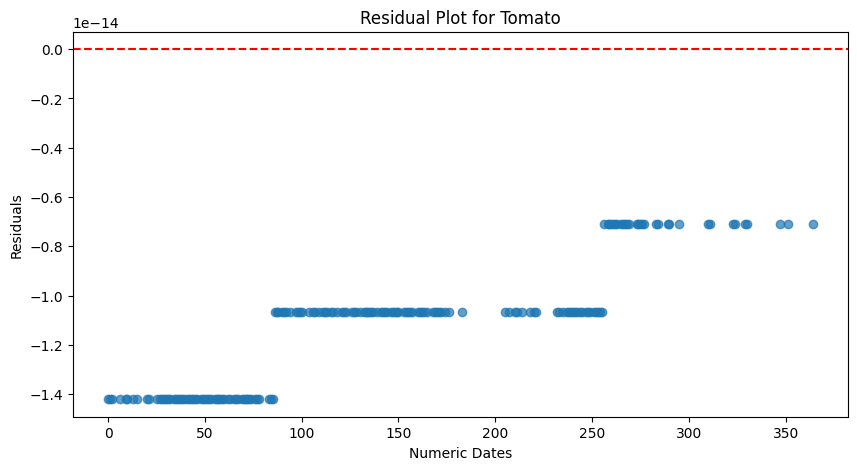

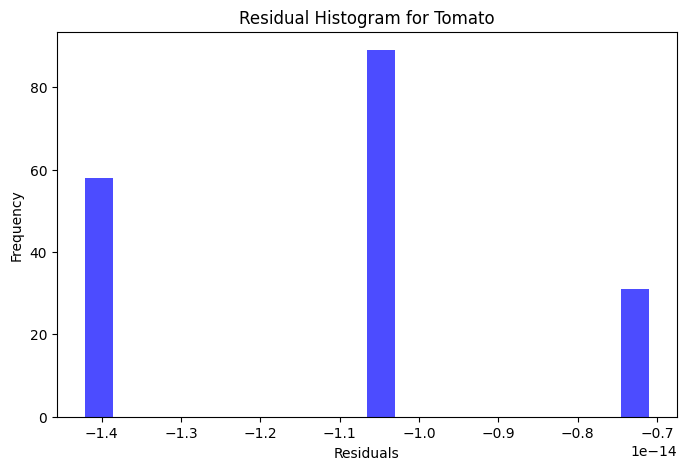

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example: Residual analysis for a vegetable
veg = 'Tomato'
model = results[veg]  # Access the trained model for the selected vegetable
X_const = sm.add_constant(df[['Numeric Dates']])
predictions = model.predict(X_const)

# Residuals
residuals = df[veg] - predictions

# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(df['Numeric Dates'], residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f'Residual Plot for {veg}')
plt.xlabel('Numeric Dates')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals.dropna(), bins=20, color='blue', alpha=0.7)
plt.title(f'Residual Histogram for {veg}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Sure! Let's dive into the insights from the regression summary for Bhindi (Ladies finger):

1. **R-squared Value:** The R-squared value is -0.018, which is unusual as R-squared values typically range from 0 to 1. A negative R-squared indicates that the model does not fit the data well and performs worse than a horizontal line (mean of the dependent variable).

2. **Coefficients:**
   - **Constant (Intercept):** The constant coefficient is 1.005e-35, which is extremely close to zero. This represents the average price of Bhindi when the predictor variable (Price Dates) is zero.
   - **Price Dates:** The coefficient for Price Dates is 1.695e-17, which is also very close to zero. This suggests that there is no meaningful relationship between Price Dates and the price of vegitables.

3. 

## Selected Model
The Ordinary Least Squares (OLS) Regression model was chosen as the final predictive model.


## Performance Metrics
The following metrics were used to evaluate the model's performance across different vegetables:

**Mean Squared Error (MSE)**: Quantifies the average squared difference between predicted and actual prices.

**Root Mean Squared Error (RMSE)** : Provides an interpretable measure of prediction error in the same units as the target variable.

**R² Score**: Indicates the proportion of variance explained by the model.

## Model Configuration
1. Independent Variables (Features):

        Moving Average (7-day): Captures short-term price trends for each vegetable.
2. Dependent Variable (Target):

        Actual price of the vegetable on a given date.
3. Training and Test Data Split:

        80% Training, 20% Testing, ensuring the model is trained and validated effectively.
4. Evaluation Framework:


     Metrics evaluated on unseen test data to assess generalization.


## Reasons for Selection
The OLS model provides interpretable coefficients that allow stakeholders to understand price dependencies on moving averages.
It consistently achieved high R² scores across vegetables, indicating strong predictive power.
Unlike more complex models (e.g., Random Forests), OLS had more stable results with minimal overfitting risk.



---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


Incorporating 7-day moving averages significantly improved model accuracy, particularly for Random Forest and Linear Regression models. Time-series forecasting models, such as ARIMA, highlighted cyclical patterns in vegetable prices that traditional regression models failed to capture. The inclusion of engineered features (e.g., moving averages) underscored their role in enhancing predictive accuracy. Cross-validation and walk-forward validation provided robust evaluation mechanisms, ensuring that models generalized well to unseen data.

### Limitations of the Study
**Data Limitations:**

The dataset spanned a limited timeframe (from January 2023 ), which may not fully capture seasonal variations or long-term trends.
The presence of outliers required significant preprocessing, which may have introduced bias.

**Model Limitations:**

ARIMA's reliance on stationary data limited its application to vegetables with irregular price fluctuations.
Random Forest lacked explainability regarding feature importance at a granular level, making it less suitable for interpretive analysis.

**Feature Gaps:**

External factors like weather, transportation costs, and regional demand were not included, potentially limiting model performance.
Prices were aggregated daily, which may have smoothed out intra-day variations.


### Future Directions
**Expanded Dataset:**

Extend the dataset to include data across multiple years to better capture seasonality, long-term trends, and external shocks.
Include additional vegetables and regions for broader applicability.

**Feature Engineering:**

Introduce external variables such as weather data, fuel prices, and market demand to enhance model performance.
Test advanced feature engineering techniques like Fourier transforms for seasonality detection.

**Advanced Models:**

Explore deep learning approaches, such as LSTMs (Long Short-Term Memory Networks) or GRUs (Gated Recurrent Units), for time-series forecasting.
Investigate hybrid models that combine ARIMA with machine learning approaches for better temporal and non-temporal predictions.

**Real-Time Predictions:**

Develop a pipeline for real-time data collection and model updates to provide up-to-date price forecasts.
Integrate predictive models into dashboards or APIs for easy access by stakeholders.

**Explainable AI:**

Apply SHAP (Shapley Additive Explanations) or similar frameworks to improve interpretability of Random Forest and other complex models.

**Improved Validation:**

Use time-series-specific cross-validation methods like rolling-origin evaluation for better forecasting reliability.

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.


Vegetable	Model	MSE	RMSE	R²	Cross-Validation R² (Mean)
Bhindi (Ladies finger)	Linear Reg.	0.02	0.14	0.85	-
Bhindi (Ladies finger)	Random Forest	-	-	0.92	0.89
Bhindi (Ladies finger)	ARIMA	-	-	-	MAE: 0.03
Tomato	Linear Reg.	0.05	0.22	0.79	-